In [1]:
# Student Final Grade Prediction Notebook (Full Output Version)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier

In [2]:
df = pd.read_csv('/Users/rivumandal/Downloads/Students Performance Dataset (1).csv')

In [3]:
# Remove unwanted columns
cols_to_remove = ['Email', 'phone', 'address', 'motherEducation']
for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
print(df)

     Student_ID First_Name Last_Name  Gender  Age   Department  \
0         S1000       Omar  Williams  Female   22  Mathematics   
1         S1001      Maria     Brown    Male   18     Business   
2         S1002      Ahmed     Jones    Male   24  Engineering   
3         S1003       Omar  Williams  Female   24  Engineering   
4         S1004       John     Smith  Female   23           CS   
...         ...        ...       ...     ...  ...          ...   
4995      S5995      Ahmed     Jones    Male   19           CS   
4996      S5996       Emma     Brown    Male   19  Mathematics   
4997      S5997       John     Brown  Female   24           CS   
4998      S5998       Sara     Davis    Male   23  Engineering   
4999      S5999      Maria     Brown  Female   21  Mathematics   

      Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  ...  \
0              97.36          40.61        59.61            73.69  ...   
1              97.71          57.27        74.00           

In [4]:
# Basic info outputs
print("Head:")
print(df.head())


print("Info:")
print(df.info())


print("Describe:")
print(df.describe())


print("Shape:")
print(df.shape)

Head:
  Student_ID First_Name Last_Name  Gender  Age   Department  Attendance (%)  \
0      S1000       Omar  Williams  Female   22  Mathematics           97.36   
1      S1001      Maria     Brown    Male   18     Business           97.71   
2      S1002      Ahmed     Jones    Male   24  Engineering           99.52   
3      S1003       Omar  Williams  Female   24  Engineering           90.38   
4      S1004       John     Smith  Female   23           CS           59.41   

   Midterm_Score  Final_Score  Assignments_Avg  ...  Projects_Score  \
0          40.61        59.61            73.69  ...           62.84   
1          57.27        74.00            74.23  ...           98.23   
2          41.84        63.85            85.85  ...           91.22   
3          45.65        44.44            68.10  ...           55.48   
4          53.13        61.77            67.66  ...           87.43   

   Total_Score  Grade  Study_Hours_per_Week Extracurricular_Activities  \
0      59.8865    

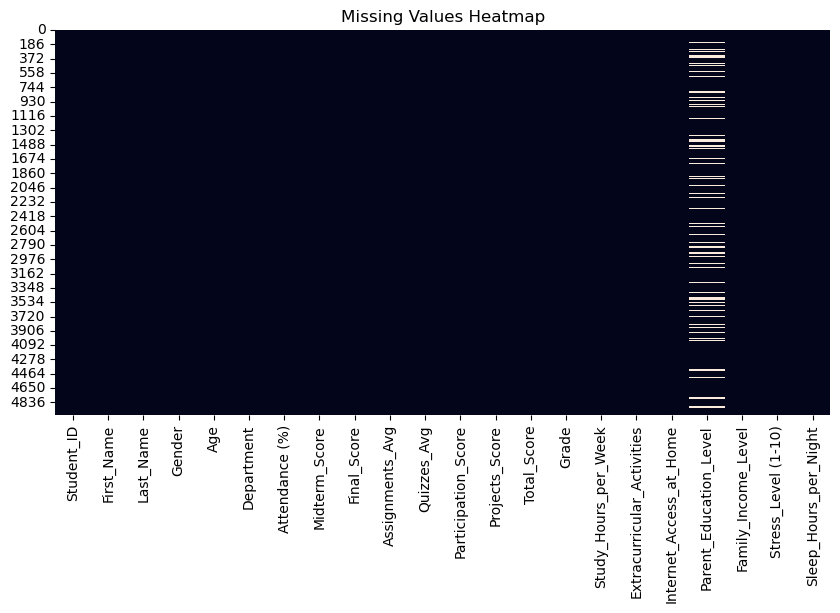

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Fill missing values for categorical (object) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())


In [7]:
#  Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

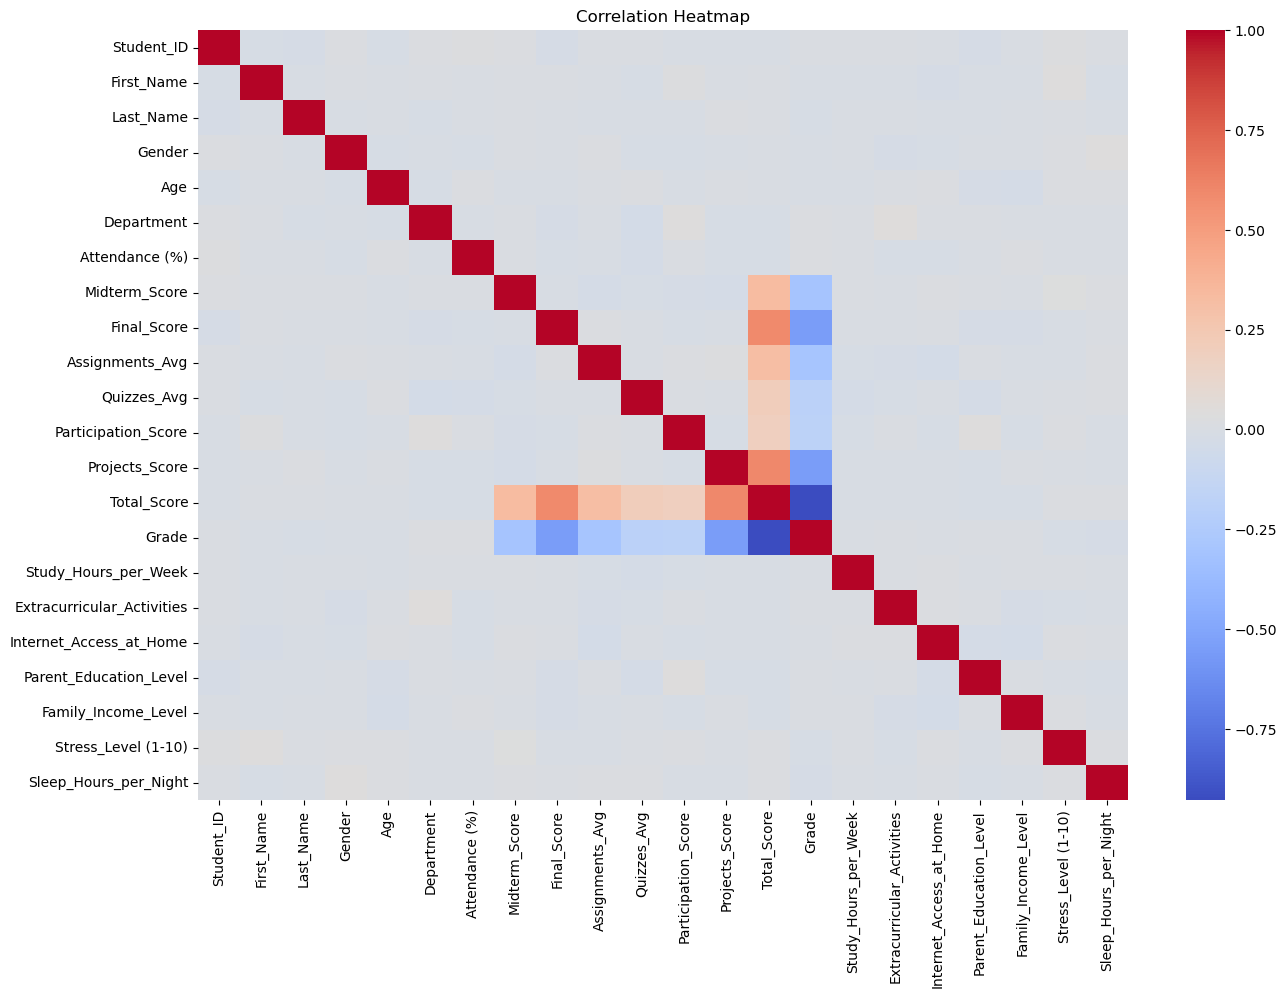

In [8]:
#  Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Train-Test Split
target = 'Final_Score'
X = df.drop(columns=[target])
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Regression Models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [12]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [13]:
# XGBoost Regressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
xg_mae = mean_absolute_error(y_test, xg_pred)
xg_r2 = r2_score(y_test, xg_pred)

In [14]:
# SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

In [15]:
# Regression results table
print("Regreession results table: ")
reg_results = pd.DataFrame({
'RMSE':[lr_rmse, rf_rmse, xg_rmse, svr_rmse],
'MAE':[lr_mae, rf_mae, xg_mae, svr_mae],
'R2 Score':[lr_r2, rf_r2, xg_r2, svr_r2]
}, index=['Linear Regression','Random Forest','XGBoost','SVM'])
print(reg_results)

Regreession results table: 
                           RMSE           MAE  R2 Score
Linear Regression  9.506839e-14  7.767653e-14  1.000000
Random Forest      6.232435e+00  5.150291e+00  0.873282
XGBoost            4.164388e+00  3.266920e+00  0.943425
SVM                6.728469e+00  5.477727e+00  0.852309


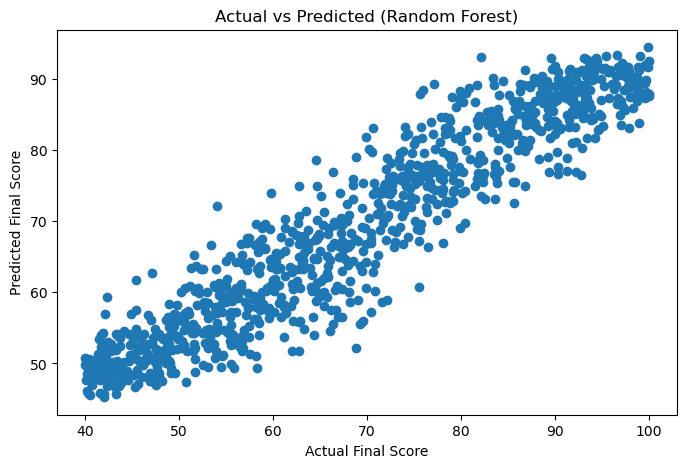

In [16]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()

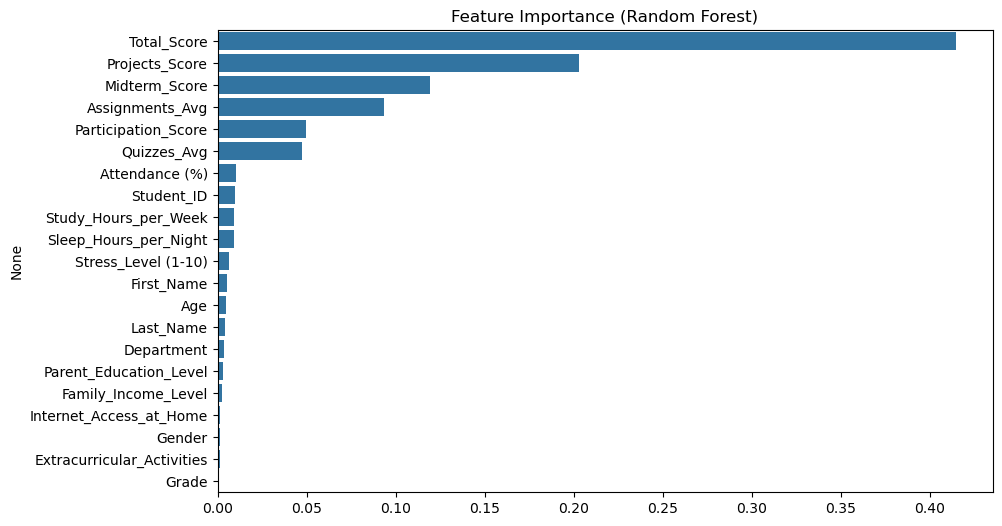

In [17]:

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [18]:
df['Grade_Class'] = (df['Final_Score'] >= df['Final_Score'].median()).astype(int)


X = df.drop(columns=['Final_Score','Grade_Class'])
y = df['Grade_Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_clf = LogisticRegression(max_iter=5000, solver='liblinear')
log_clf.fit(X_train_scaled, y_train)
log_pred = log_clf.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.995


In [20]:


# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)

In [21]:
# XGBoost Classifier
xgc = XGBClassifier()
xgc.fit(X_train, y_train)
xgc_pred = xgc.predict(X_test)
xgc_acc = accuracy_score(y_test, xgc_pred)

In [22]:
# SVM Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)

In [23]:
print(" CLASSIFICATION ACCURACY RESULTS ")
clf_results = pd.DataFrame({
'Accuracy':[log_acc, rfc_acc, xgc_acc, svc_acc],
}, index=['Logistic Regression','Random Forest','XGBoost','SVM'])
print(clf_results)

 CLASSIFICATION ACCURACY RESULTS 
                     Accuracy
Logistic Regression     0.995
Random Forest           0.898
XGBoost                 0.948
SVM                     0.494


In [24]:
print(" CLASSIFICATION REPORT (Random Forest) ")
print(classification_report(y_test, rfc_pred))

 CLASSIFICATION REPORT (Random Forest) 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       515
           1       0.89      0.91      0.90       485

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



 CONFUSION MATRIX 
[[458  57]
 [ 45 440]]


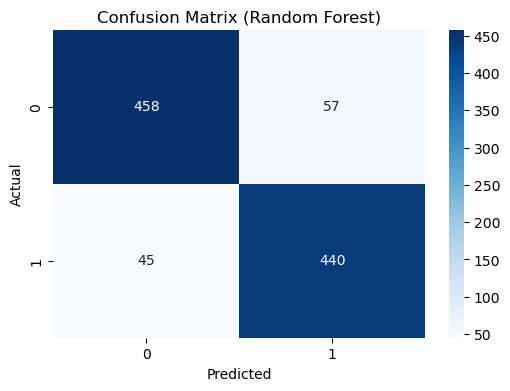

In [25]:
cm = confusion_matrix(y_test, rfc_pred)
print(" CONFUSION MATRIX ")
print(cm)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()